In [1]:
# Repository github url : https://github.com/jai-mr/
# Assignment Repository : https://github.com/jai-mr/Assignment-12/12_Annotate
# Submitted by : Jaideep Rangnekar
# Registered email id : jaideepmr@gmail.com

In [2]:
# Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
from google.colab import drive
drive.mount("/content/gdrive")
gdrivepath="/content/gdrive/My Drive/Colab Notebooks/S12"

Mounted at /content/gdrive


In [3]:
!pwd

/content


In [4]:
import os 
os.chdir(gdrivepath)
!ls


 12_Annonate.ipynb		        images
 12_CodeFinal.ipynb		        packages
 content			        S12_ImageAnnotate.json
'Copy of S12_ImageAnnotate_json.json'   S12_ImageAnnotate_json.json


In [5]:
import os,json,math
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import numpy as np 
import matplotlib.pyplot as plt  
import pandas as pd
%matplotlib inline
from tqdm.notebook import tqdm, trange
path = './images/'
from skimage import io
imagesizesdict = {}
for fileobj in os.listdir(path):
  imgobj = io.imread(f'{path}{fileobj}', as_gray=False)
  imagesizesdict[fileobj] = imgobj.shape[:2]

In [6]:
imagesizesdict

{'Image_0.jpg': (1014, 1300),
 'Image_1.jpg': (1390, 966),
 'Image_10.jpg': (640, 427),
 'Image_100.jpg': (640, 427),
 'Image_101.jpg': (640, 960),
 'Image_102.jpg': (750, 750),
 'Image_103.jpg': (900, 900),
 'Image_104.jpg': (494, 700),
 'Image_105.jpg': (480, 852),
 'Image_106.jpg': (200, 542),
 'Image_107.jpg': (500, 435),
 'Image_108.jpg': (1500, 1500),
 'Image_109.jpg': (344, 612),
 'Image_11.jpg': (899, 1600),
 'Image_110.jpg': (433, 640),
 'Image_111.jpg': (1134, 850),
 'Image_112.jpg': (300, 620),
 'Image_113.jpg': (470, 301),
 'Image_114.jpg': (900, 600),
 'Image_115.jpg': (800, 800),
 'Image_116.jpg': (216, 300),
 'Image_117.jpg': (782, 750),
 'Image_118.jpg': (1200, 800),
 'Image_119.jpg': (1000, 750),
 'Image_12.jpg': (800, 534),
 'Image_120.jpg': (408, 612),
 'Image_121.jpg': (220, 300),
 'Image_122.jpg': (800, 566),
 'Image_123.jpg': (418, 700),
 'Image_124.jpg': (900, 600),
 'Image_125.jpg': (640, 640),
 'Image_126.jpg': (573, 836),
 'Image_127.jpg': (1125, 1500),
 'Imag

In [7]:
annot_json = json.load(open('./S12_ImageAnnotate_json.json'))
df = pd.DataFrame()
datadict = []
for k, v in annot_json.items():
  for row in v['regions']:
    rec = {'name': v['filename'] }
    shape = row['shape_attributes']
    h, w = imagesizesdict[v['filename']]
    rec['h'] = shape['height']
    rec['w'] = shape['width']
    rec['x'] = shape['x']
    rec['y'] = shape['y']
    rec['image_w'] = w
    rec['image_h'] = h
    rec['height'] = shape['height']/h
    rec['width'] = shape['width']/w
    rec['log_height'] = math.log(shape['height']/h)
    rec['log_width'] = math.log(shape['width']/h)

    datadict.append(rec)


df = pd.DataFrame.from_dict(datadict, orient='columns')
df


,name,h,w,x,y,image_w,image_h,height,width,log_height,log_width
0,Image_0.jpg,429,220,21,106,1300,1014,0.423077,0.169231,-0.860201,-1.528031
1,Image_0.jpg,523,225,512,315,1300,1014,0.515779,0.173077,-0.662077,-1.505558
2,Image_0.jpg,525,282,819,266,1300,1014,0.517751,0.216923,-0.658260,-1.279751
3,Image_1.jpg,253,222,356,211,966,1390,0.182014,0.229814,-1.703670,-1.834382
4,Image_1.jpg,163,169,700,77,966,1390,0.117266,0.174948,-2.143309,-2.107160
...,...,...,...,...,...,...,...,...,...,...,...
336,Image_161.jpg,114,59,199,549,640,729,0.156379,0.092188,-1.855475,-2.514136
337,Image_161.jpg,121,95,242,543,640,729,0.165981,0.148438,-1.795883,-2.037797
338,Image_162.jpg,76,88,121,220,450,320,0.237500,0.195556,-1.437588,-1.290984
339,Image_162.jpg,55,98,307,234,450,320,0.171875,0.217778,-1.760988,-1.183354


In [8]:
annot_json = json.load(open('./S12_ImageAnnotate_json.json'))
df = pd.DataFrame()
datadict = []
for k, v in annot_json.items():
#  print(k)
#  print(v)
  for row in v['regions']:
#    print("row :",row)
    rec = {'name': v['filename'] }
    region = row['region_attributes']
 #   print("region:",region)
    cl=""
 ##   for row1 in region:
      # print("1:",row1)
 ##     if row1 == "class":
        # print("in class")
 ##       cl=region[row1]
        # print("cl:",cl)        
  ##      break
  ##  rec['class'] = cl

    shape = row['shape_attributes']
    h, w = imagesizesdict[v['filename']]
    rec['h'] = shape['height']
    rec['w'] = shape['width']
    rec['x'] = shape['x']
    rec['y'] = shape['y']
    rec['image_w'] = w
    rec['image_h'] = h
    rec['height'] = shape['height']/h
    rec['width'] = shape['width']/w
    rec['log_height'] = math.log(shape['height']/h)
    rec['log_width'] = math.log(shape['width']/h)
    datadict.append(rec)


df = pd.DataFrame.from_dict(datadict, orient='columns')
## df.groupby(['class']).size()


In [9]:
df

,name,h,w,x,y,image_w,image_h,height,width,log_height,log_width
0,Image_0.jpg,429,220,21,106,1300,1014,0.423077,0.169231,-0.860201,-1.528031
1,Image_0.jpg,523,225,512,315,1300,1014,0.515779,0.173077,-0.662077,-1.505558
2,Image_0.jpg,525,282,819,266,1300,1014,0.517751,0.216923,-0.658260,-1.279751
3,Image_1.jpg,253,222,356,211,966,1390,0.182014,0.229814,-1.703670,-1.834382
4,Image_1.jpg,163,169,700,77,966,1390,0.117266,0.174948,-2.143309,-2.107160
...,...,...,...,...,...,...,...,...,...,...,...
336,Image_161.jpg,114,59,199,549,640,729,0.156379,0.092188,-1.855475,-2.514136
337,Image_161.jpg,121,95,242,543,640,729,0.165981,0.148438,-1.795883,-2.037797
338,Image_162.jpg,76,88,121,220,450,320,0.237500,0.195556,-1.437588,-1.290984
339,Image_162.jpg,55,98,307,234,450,320,0.171875,0.217778,-1.760988,-1.183354


In [10]:
with open('./S12_ImageAnnotate_json.json') as fp:
    data = json.load(fp)
print(json.dumps(data["Image_0.jpg178538"], indent=2))


{
  "filename": "Image_0.jpg",
  "size": 178538,
  "regions": [
    {
      "shape_attributes": {
        "name": "rect",
        "x": 21,
        "y": 106,
        "width": 220,
        "height": 429
      },
      "region_attributes": {
        "class": "boots",
        "type": "safetygear",
        "image_quality": {
          "frontal": true,
          "good_illumination": true
        }
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 512,
        "y": 315,
        "width": 225,
        "height": 523
      },
      "region_attributes": {
        "class": "boots",
        "type": "safetygear",
        "image_quality": {
          "frontal": true,
          "good_illumination": true
        }
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 819,
        "y": 266,
        "width": 282,
        "height": 525
      },
      "region_attributes": {
        "class": "boots",
        "type": "safetygear",
        "im

In [11]:
# https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
# https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

In [12]:
def iou(box, centroids):
    x = np.minimum(np.exp(centroids[:, 0]), np.exp(box[0]))
    y = np.minimum(np.exp(centroids[:, 1]), np.exp(box[1]))

    intersection = x * y
    box_area = np.exp(box[0]) * np.exp(box[1])
    centroid_area = np.exp(centroids[:, 0]) * np.exp(centroids[:, 1])

    iou_ = intersection / (box_area + centroid_area - intersection)
    #return iou_
    return (np.max(iou_), np.argmax(iou_))

X = df[['log_width', 'log_height']].to_numpy()

In [13]:
# Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.
# Inertia: It is the sum of squared distances of samples to their closest cluster center.
# https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

In [14]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
centroids = {}
memberships = {}
miou = []
K = range(1, 21)

for k in K:
  kmeansModel = KMeans(n_clusters=k).fit(X)
  distortions.append(sum(np.min(cdist(X, kmeansModel.cluster_centers_, 
                      'euclidean'),axis=1)) / X.shape[0]) 
  inertias.append(kmeansModel.inertia_) 

  mapping1[k] = sum(np.min(cdist(X, kmeansModel.cluster_centers_, 
                'euclidean'),axis=1)) / X.shape[0] 
  mapping2[k] = kmeansModel.inertia_ 
  
  centroids[k] = kmeansModel.cluster_centers_
  maxiou = np.array([iou(b, centroids[k])  for b in X])
  memberships[k] = maxiou[:, 1].astype(np.uint8)
  # find mean of maximum IOU between bounding boxes and individual anchors
  miou.append(np.mean(maxiou[:, 0]))

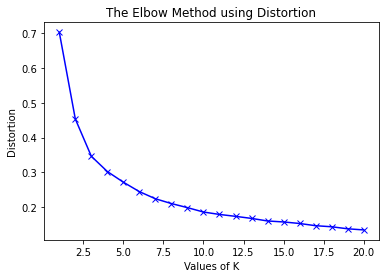

In [15]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show() 

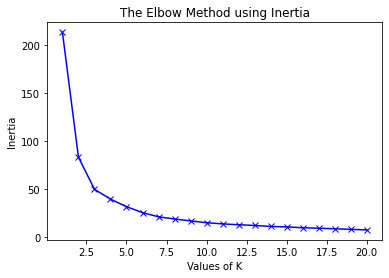

In [16]:
plt.plot(K, inertias, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show() 

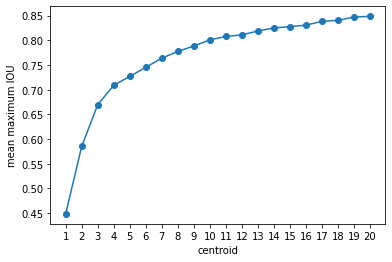

In [17]:
def plotIOU(X, Y):
  plt.scatter(X, Y)
  plt.plot(X, Y)
  plt.xlabel("centroid")
  plt.ylabel("mean maximum IOU")
  plt.xticks(np.arange(1, 21))
  plt.show()

plotIOU(K, miou)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


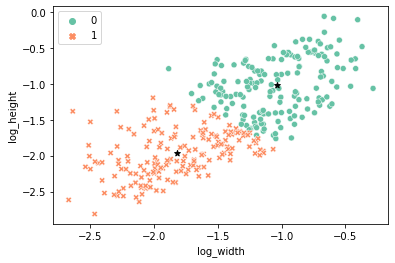

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


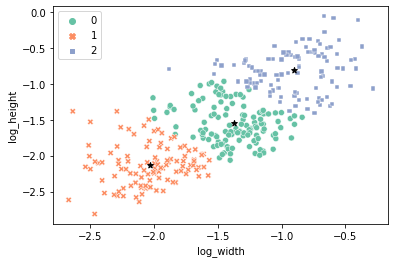

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


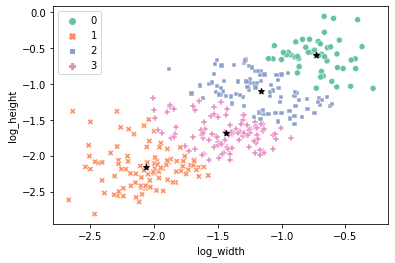

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


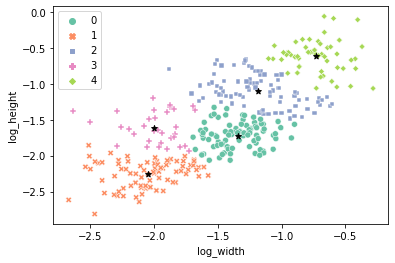

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


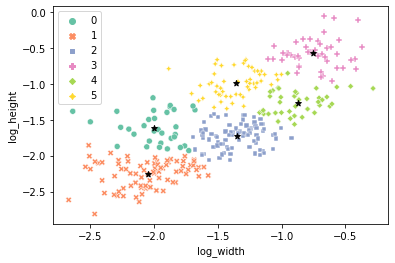

In [18]:
import seaborn as sns
def plotclusters(k):
  #ax = df.plot.scatter('log_width', 'log_height', c=f'cluster{k}', colormap='viridis')
  ax = sns.scatterplot('log_width', 'log_height', data=df, hue=memberships[k], style = memberships[k], palette="Set2")
  ax.scatter(centroids[k][:,0], centroids[k][:,1], marker='*', c='black')
  plt.show()

for k in range(2,7):
  plotclusters(k)

In [19]:
def ioudist(box, centroid):
    #print(centroid)
    x = np.minimum(np.exp(centroid[0]), np.exp(box[0]))
    y = np.minimum(np.exp(centroid[1]), np.exp(box[1]))

    intersection = x * y
    box_area = np.exp(box[0]) * np.exp(box[1])
    centroid_area = np.exp(centroid[0]) * np.exp(centroid[1])

    iou_ = intersection / (box_area + centroid_area - intersection)
    return 1 - iou_

In [20]:
!pip install pyclustering

     |████████████████████████████████| 2.7MB 2.8MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.0.1-cp36-none-any.whl size=2615590 sha256=12be22e211b166d1993939d2a49faaa336fb147496701a6427d0211d063a4405
  Stored in directory: /root/.cache/pip/wheels/7c/eb/8d/ce15daecf5a50483a8fbaf1d1e3cb2d7bbaeb0ad709af32419
Successfully built pyclustering


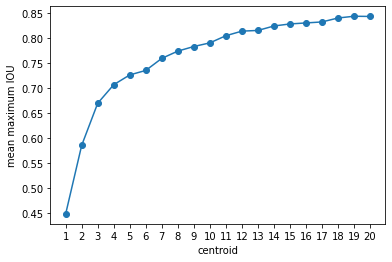

In [21]:
from pyclustering.cluster.kmeans import kmeans, kmeans_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.utils.metric import type_metric, distance_metric

metric = distance_metric(type_metric.USER_DEFINED, func=ioudist)
clusters = []
final_centers = []
mean_iou = []
for k in K:
  # Prepare initial centers using K-Means++ method.
  initial_centers = kmeans_plusplus_initializer(X, k).initialize()

  if k==1:
    kmeans_instance = kmeans(X, initial_centers)  
  else:
    kmeans_instance = kmeans(X, initial_centers, metric=metric)

  kmeans_instance.process()
  clusters.append(kmeans_instance.get_clusters())
  c = np.array(kmeans_instance.get_centers())
  final_centers.append(c)
  maxiou = np.array([iou(b, c)  for b in X])
  mean_iou.append(np.mean(maxiou[:, 0]))
plotIOU(K, mean_iou)

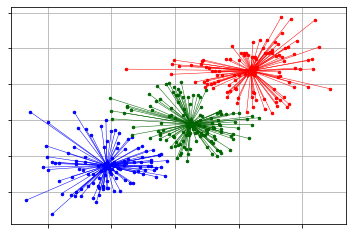

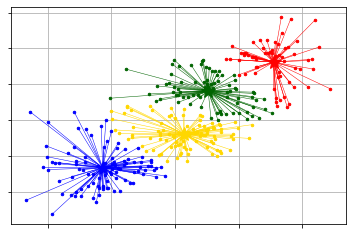

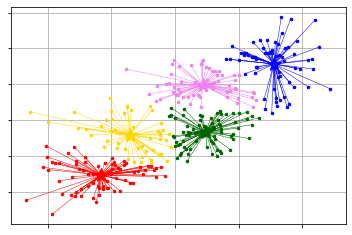

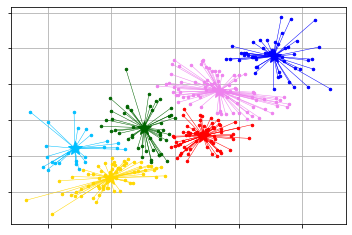

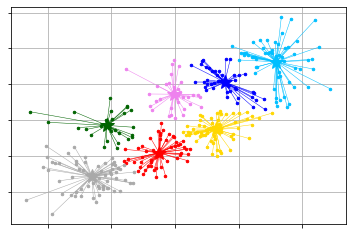

In [22]:
for k in range(2, 7):
  kmeans_visualizer.show_clusters(X, clusters[k], final_centers[k])